In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import  accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('WineQT.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [3]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [4]:
x = df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide',
        'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]
y = df['quality']

In [5]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 101)

# Логистическая регрессия

In [7]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(x_train,y_train)
lr_predict = lr_model.predict(x_test)

print('Logistic Regression - ',accuracy_score(lr_predict,y_test))

Logistic Regression -  0.6559766763848397


#  SVC

In [8]:
from sklearn.svm import SVC
svm_model = SVC(kernel='linear')
svm_model.fit(x_train,y_train)
svc_predict = svm_model.predict(x_test)

print('SVM - ',accuracy_score(svc_predict,y_test))

SVM -  0.6559766763848397


# Naive Bayes Classification

In [9]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(x_train,y_train)
nb_predict = nb_model.predict(x_test)

print('Naive bayes - ',accuracy_score(nb_predict,y_test))

Naive bayes -  0.5743440233236151


# Decision tree

In [10]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(max_leaf_nodes=3)
dt_model.fit(x_train,y_train)
dt_predict = dt_model.predict(x_test)

print('Decision Tree - ',accuracy_score(dt_predict,y_test))

Decision Tree -  0.6064139941690962


# Random forest

In [11]:
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier(max_depth=3)
rfc_model.fit(x_train,y_train)
rfc_predict = rfc_model.predict(x_test)

print('Random Forest - ',accuracy_score(rfc_predict,y_test))

Random Forest -  0.641399416909621


# Extra Tree Classifier

In [12]:
from sklearn.ensemble import ExtraTreesClassifier
etc_model = ExtraTreesClassifier()
etc_model.fit(x_train,y_train)
etc_predict = etc_model.predict(x_test)

print('Extra Tree Classifier - ',accuracy_score(etc_predict,y_test))

Extra Tree Classifier -  0.6822157434402333


# KNN

In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train,y_train)
knn_predict = knn_model.predict(x_test)

print('knn - ',accuracy_score(knn_predict,y_test))

knn -  0.4868804664723032


# Gradient Boosting

In [14]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
     max_depth=1, random_state=1).fit(x_train, y_train)
clf.score(x_test, y_test)

0.5072886297376094

# Deep Learing

In [15]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [16]:
from sklearn.preprocessing import StandardScaler, LabelBinarizer
x = df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide',
        'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]
y = df['quality']

X = StandardScaler().fit_transform(x)
y = LabelBinarizer().fit_transform(y)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)
len(df['quality'].unique())

6

In [17]:
shallow_model = Sequential()
shallow_model.add(Dense(11, activation='relu'))
shallow_model.add(Dense(9, activation='relu'))
shallow_model.add(Dense(6, activation='softmax'))
shallow_model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [18]:
shallow_history = shallow_model.fit(x_train, y_train, epochs = 180, validation_data = (x_test, y_test))

Epoch 1/180
25/25 [==============================] - 3s 27ms/step - loss: 0.7947 - accuracy: 0.2138 - val_loss: 0.7652 - val_accuracy: 0.1633
Epoch 2/180
25/25 [==============================] - 0s 11ms/step - loss: 0.7230 - accuracy: 0.2925 - val_loss: 0.7039 - val_accuracy: 0.2682
Epoch 3/180
25/25 [==============================] - 0s 10ms/step - loss: 0.6709 - accuracy: 0.3512 - val_loss: 0.6556 - val_accuracy: 0.3557
Epoch 4/180
25/25 [==============================] - 0s 13ms/step - loss: 0.6273 - accuracy: 0.3963 - val_loss: 0.6126 - val_accuracy: 0.4227
Epoch 5/180
25/25 [==============================] - 0s 9ms/step - loss: 0.5860 - accuracy: 0.4162 - val_loss: 0.5702 - val_accuracy: 0.4461
Epoch 6/180
25/25 [==============================] - 0s 10ms/step - loss: 0.5442 - accuracy: 0.4275 - val_loss: 0.5279 - val_accuracy: 0.4606
Epoch 7/180
25/25 [==============================] - 0s 10ms/step - loss: 0.5014 - accuracy: 0.4338 - val_loss: 0.4840 - val_accuracy: 0.4752
Epoch 8

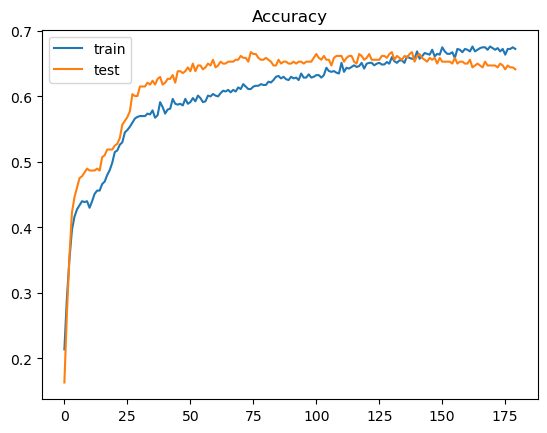

In [19]:
plt.plot(shallow_history.history['accuracy'])
plt.plot(shallow_history.history['val_accuracy'])
plt.title("Accuracy")
plt.legend(['train', 'test'])
plt.show()

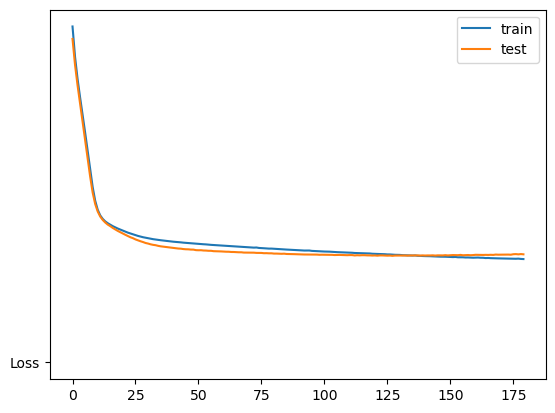

In [20]:
plt.plot(shallow_history.history['loss'])
plt.plot(shallow_history.history['val_loss'])
plt.plot('Loss')
plt.legend(['train','test'])
plt.show()